In [2]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt 

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Set-up experiment

# Mnist dataset experiment 

In [3]:
# Load the CSV file
Mnist_data = pd.read_csv("data\Mnist\mnist_train.csv")
Mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def image_show (df:pd.DataFrame, shape: tuple[int,int], index: int, column_to_drop:str = ""): 
    if len(column_to_drop) != 0:
        Mnist_data_resized = np.array(df.iloc[index].drop(column_to_drop)).reshape(shape[0],shape[1])
        plt.imshow(Mnist_data_resized, cmap='gray')
        plt.show()
    else:
        Mnist_data_resized = np.array(df.iloc[index]).reshape(shape[0],shape[1])
        plt.imshow(Mnist_data_resized, cmap='gray')
        plt.show()

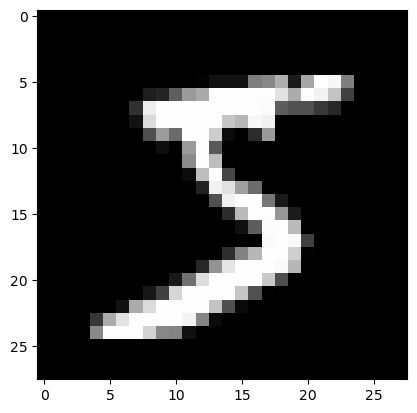

In [5]:
image_show(Mnist_data,(28,28),0,"label")

In [6]:
# Mnist_data_rotated = np.rot90(Mnist_data.iloc[:, 1:].values.reshape(-1, 28, 28), k=-1, axes=(1, 2))
# Mnist_data_rotated = Mnist_data_rotated.reshape(60000, 784)
# Mnist_data_rotated_df = pd.DataFrame(Mnist_data_rotated.reshape(-1, 28*28))
# Mnist_data_rotated_df['label'] = Mnist_data['label']
# Mnist_data_rotated_df.head()
# column_names = Mnist_data.columns[1:]
# Mnist_data_rotated_df.columns = column_names.tolist() + ['label']
# Mnist_data_rotated_df.to_csv("data/Mnist/mnist_test_rotated.csv")

Mnist_data_rotated_df = pd.read_csv("data/Mnist/mnist_test_rotated.csv")

## Incremental-ks

In [7]:
from random import random
from collections import deque

In [8]:
from incremental_ks.IncrementalKS.IKSSW import IKS, IKSSW

In [9]:
def detect_drift_iks(df_train, df_test):

  iks_statistics = [] # collect statistics generated by IKS
  iks = IKS() # group 0 = reference; group 1 = sliding

  sliding = deque()

  for _, row in df_train.iterrows():
    iks.Add((row, random()), 0)
    wrnd = (row, random()) # we only need to keep RND component for values in the sliding window
    iks.Add(wrnd, 1)
    sliding.append(wrnd)

  # process sliding window
  for _, row in df_test.iterrows():
    iks.Remove(sliding.popleft(), 1)
    wrnd = (row, random())
    iks.Add(wrnd, 1)
    sliding.append(wrnd)

    iks_statistics.append(iks.KS())
  
  return iks_statistics


In [10]:
mnist_reference = Mnist_data.drop(columns=['label']).copy()

In [11]:
iks_statistics = [] # collect statistics generated by IKS
iks = IKSSW(mnist_reference.iloc[0]) # group 0 = reference; group 1 = sliding and # add first image as the first reference

for i, row in Mnist_data[1:].drop(columns=['label']).iterrows():
  if iks.Test(): 
    iks.Update()
    print("Drift detected")

  # process sliding window
  for val in row:
    print(val)
    iks.Increment(val)

    iks_statistics.append(iks.KS())
    break_loops = True


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
51
159
253
159
50
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
48
238
252
252
252
237
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
54
227
253
252
239
233
252
57
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
60
224
252
253
252
202
84
252
253
122
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
163
252
252
252
253
252
252
96
189
253
167
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
51
238
253
253
190
114
253
228
47
79
255
168
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
48
238
252
252
179
12
75
121
21
0
0
253
243
50
0
0
0
0
0
0
0
0
0
0
0
0
0
38
165
253
233
208
84
0
0
0
0
0
0
253
252
165
0
0
0
0
0
0
0
0
0
0
0
0
7
178
252
240
71
19
28
0
0
0
0
0
0
253
252
195
0
0
0
0
0
0
0
0
0
0
0
0
57
252
252
63
0
0
0
0
0
0
0
0
0
253
252
195
0
0
0
0
0
0
0
0
0
0
0
0
198
253
190
0
0
0
0
0
0
0
0
0
0
255
253
196
0


KeyboardInterrupt: 

In [ ]:
iks_statistics = [] # collect statistics generated by IKS
iks = IKSSW(mnist_reference.iloc[0]) # group 0 = reference; group 1 = sliding and # add first image as the first reference

for i, row in Mnist_data[1:].drop(columns=['label']).iterrows():
  if iks.Test():
    print(f"Drift detected at i: {i}") 
    break

  # process sliding window
  for val in row:
    iks.Increment(val)
    iks_statistics.append(iks.KS())


Drift detected at i: 9


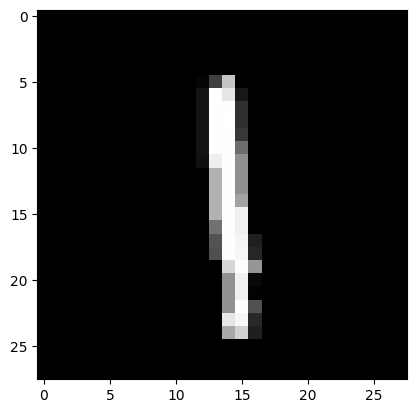

In [ ]:
image_show(mnist_reference,(28,28),i-1)

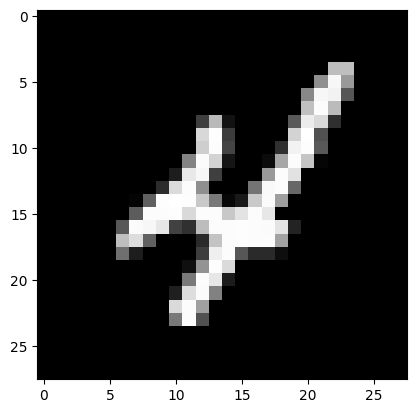

In [ ]:
image_show(mnist_reference,(28,28),i)

In [ ]:
iks_statistics = [] # collect statistics generated by IKS
iks = IKSSW(mnist_reference.iloc[0]) # group 0 = reference; group 1 = sliding and # add first image as the first reference

for i, row in Mnist_data[1:].drop(columns=['label']).iterrows():
  if iks.Test(): 
    iks.Update()
    print("Drift detected")

  # process sliding window
  for val in row:
    iks.Increment(val)

    iks_statistics.append(iks.KS())

In [ ]:
detect_drift_iks(Mnist_data.drop(columns=['label']),Mnist_data_rotated_df.drop(columns=['label']))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
from time import time
from itertools import chain
from random import random

from collections import deque

initial = np.random.normal(loc = 0, scale = 1, size = 500)

stream = list(chain(*[np.random.normal(loc = 1.0 * (i % 2), scale = 1, size = 500) for i in range(10)]))

######################
## TEST IKS
######################

start = time()

iks_statistics = [] # collect statistics generated by IKS
iks = IKS() # group 0 = reference; group 1 = sliding

sliding = deque()

for val in initial:
  iks.Add((val, random()), 0)
  wrnd = (val, random()) # we only need to keep RND component for values in the sliding window
  iks.Add(wrnd, 1)
  sliding.append(wrnd)

# process sliding window
for val in stream:
  iks.Remove(sliding.popleft(), 1)
  wrnd = (val, random())
  iks.Add(wrnd, 1)
  sliding.append(wrnd)

  iks_statistics.append(iks.KS())

finish = time()
print(f'Elapsed time for IKS to process stream: {round(finish - start, 2)} sec')

Elapsed time for IKS to process stream: 1.3 sec


# Bin

In [ ]:
# data_sin = pd.read_csv('../data/Sine.csv', index_col=0)
# data_sin['Classification'] = data_sin['Classification'].map({'Initially Negative':0,'Initially Positive':1})
# data_sin['Concept Drift'] = data_sin['Concept Drift'].map({'After Concept Drift Negative':0,'After Concept Drift Positive':1})

# data_sin_tmp = data_sin.copy()
# df_y = data_sin_tmp['Classification']

# training_proportion = int(2*len(data_sin)/5000)
# print(training_proportion)
# df_x_train = data_sin_tmp[0:training_proportion].drop(columns=['Concept Drift','Classification'])
# df_y_train = df_y[0:training_proportion]

# data_test = data_sin_tmp.iloc[training_proportion:len(data_sin_tmp)].reset_index(drop=True)
# classifier = tree.DecisionTreeClassifier()
# classifier.fit(df_x_train, df_y_train)
# y_out = np.ndarray([1,2])
# batcher = BatchGenerator(500,data_test)
# ddal = DDAL(size_batch=500, theta=0.005, lambida=0.90)

# for batch_test in batcher:
#     batch_test = batch_test.drop(columns=['Concept Drift','Classification'])
#     for index,_ in batch_test.iterrows():
#         y_pred = classifier.predict_proba(batch_test.iloc[[index]])
#         y_out = np.concatenate((y_out,y_pred))
#         max_y_pred_prob = y_pred.max()
#         ddal.count_selected_instances(max_y_pred_prob)

#     ddal.compute_current_density()

#     if ddal.detection_module():
#         print('Drift Detected')
#         ddal.reset()
        
#     else:
#         print('No drift detected')

In [ ]:
# # Load the CSV file
# Sine_data = pd.read_csv("data\Sine.csv", index_col=0)
# Sine_data.head()